In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# Imports and Def Functions

In [0]:
from keras.datasets import imdb
from keras.layers import GRU, LSTM, CuDNNGRU, CuDNNLSTM, Activation
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Dropout

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition, base
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, SGDClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import roc_curve, f1_score, precision_score, recall_score, auc, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_importance
import time

import copy 
import pickle
from IPython.display import display
from matplotlib import interactive 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
pd.options.display.max_columns = 40

from datetime import*
import time

from sklearn import datasets, linear_model
from keras import regularizers
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

import copy
from keras.layers import *   #è incluso Flatten
from keras.models import *
from keras.layers import Concatenate, concatenate
#from keras.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [0]:
os.chdir('./Colab_datasets/Final_versions')
os.getcwd()

In [61]:
with open('./final_reg_10sn.pickle', 'rb') as reg:
    container_reg=  pickle.load(reg)

container_reg.keys()

dict_keys(['X_train', 'X_test', 'ytrain', 'ytest'])

In [63]:
REMOVE_TRIMESTERS= False
BETWEEN_100= True
trimesters_cols= [col for col in container_reg['X_train'].columns if col.startswith('orders_trim')]+ ['initial_trimester']

X_train= round(container_reg['X_train'],3)
X_test= round(container_reg['X_test'],3)
"""ytrain= round(container_reg['ytrain']/100, 4)
ytest= round(container_reg['ytest']/100,4)"""

if BETWEEN_100 is True:
  ytrain= round(container_reg['ytrain'], 2)
  ytest= round(container_reg['ytest'],2)

if REMOVE_TRIMESTERS:
  for X in ['X_train', 'X_test']:
    container_reg[X].drop(trimesters_cols, axis=1, inplace=True)

X_train.shape, X_test.shape, ytrain.shape, ytest.shape  #((76326, 32), (13270, 32), (76326,), (13270,))

((76326, 32), (13270, 32), (76326,), (13270,))

In [64]:
ytrain.head()

10    89.49
11    89.49
12    89.49
13    89.49
14    89.49
Name: Target%, dtype: float64

In [0]:
def container_modello(task):
    """Return un diz con chiavi X_train, X_test, y_train, y_test, best_estimator
    caso: 'classo', 'rollingreg', 'rollingreg' """
        
    if task== 'reg':
        X_train= container_reg['X_train']
        X_test= container_reg['X_test']
        y_train= container_reg['ytrain']
        y_test= container_reg['ytest']
        #best_est= best_reg_rf
        #feat_imp= feats_imp_rfreg
        
    return {'X_train': X_train, 'X_test': X_test, 'ytrain': y_train, 'ytest': y_test}

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6)):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color='red', fontsize= 18, pad= 13)
    plt.xlabel(xlabel, color='red', fontsize= 14)
    plt.ylabel(ylabel, color='red', fontsize= 14)
    plt.xticks(fontsize=12, color='blue')
    plt.yticks(fontsize=12, color='blue')
     
def summary_reg_grid(grid_fit, scaled_train, Y_train, scaled_test, Y_test):
    """current_minimize è inutile"""
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    
    #print('\n\033[1mtrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    #print('\033[1mtest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    idx_max_val_score= np.argmax(grid_fit.cv_results_['mean_test_score'])
    
    # Siccome MAE è molto piu lento da minimizzare, quando algoritmi vanno lenti mi conviene minimizzare MSE e 
    # calcolare MAE a mano in corrispondenza del modello migliore trovato minimizzando MSE.
    
    print('\n\033[1mTrain MAE is {} \033[0m'.format(round(-1* grid_fit.cv_results_['mean_train_score'][idx_max_val_score],4)))
    # Validation score controllato manualmente è sempre uguale a quello dato da grid.best_score_
    #print("\n\033[1m 'MANUAL' Validation MAE \033[0m is {}):".format(round(-1*max(grid_fit.cv_results_['mean_test_score']) ,4)))
    print("\033[1mValidation MAE \033[0m (best mean CV score) is \033[1m {} \033[0m".format(round(-1*grid_fit.best_score_ ,4))) #Mean cross-validated score of the best_estimator
    
    #elif current_minimize == 'mse':
        #print('..Calculating MAE by hand for the best model on the whole Train and Test set..')
        #print('\n\033[1mTrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    
    print('\033[1mTest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_train, grid_fit.predict(scaled_train))),4)))
    print('\033[1mtest RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_test, grid_fit.predict(scaled_test))),4)))


def plot_model_history(history, measures = ["mean_absolute_error", "mean_absolute_percentage_error", "loss"]):

  plt.style.use("ggplot")
  (fig, ax) = plt.subplots(1, 3, figsize=(20, 5))

  # loop over the accuracy names
  for (i, l) in enumerate(measures):
    # plot the loss for both the training and validation data
    ax[i].set_xlabel("Epoch #")
    if l!= 'loss':
      ax[i].set_title("{}".format(l ))
      ax[i].set_ylabel("{}".format(l))
    else:
      ax[i].set_title("Loss")
      ax[i].set_ylabel("Loss")
    #ax[i].plot(np.arange(0, epochs), history.history[l], label=l)
    #ax[i].plot(np.arange(0, epochs), history.history["val_" + l], label="val_" + l)
    ax[i].plot(history.history[l], label=l)
    ax[i].plot( history.history["val_" + l], label="val_" + l)
    ax[i].legend()

  plt.tight_layout() 
  plt.show()
  plt.close()

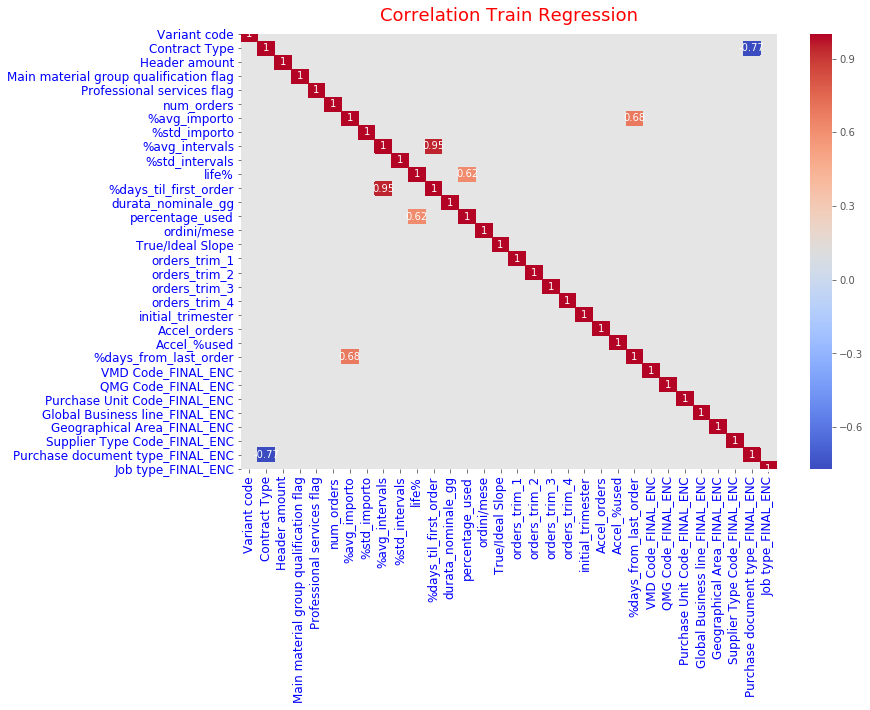

In [66]:
soglia = 0.6

title_ticks_ecc('Correlation Train Regression', '', '', figsize=(12, 8))
sns.heatmap(container_reg['X_train'].corr()[abs(container_reg['X_train'].corr())> soglia ], cmap= 'coolwarm', annot= True,)

In [67]:
feats_binarie= ['Variant code', 'Contract Type', 'Main material group qualification flag', 'Professional services flag']

new_feats= ['num_orders', '%avg_importo', '%std_importo', '%avg_intervals', '%std_intervals', 'life%', '%days_from_last_order', '%days_til_first_order', 'True/Ideal Slope', 
             'ordini/mese']
feats_create= new_feats
encoded_cols= [col for col in container_reg['X_train'].columns if col.endswith('ENC') ] 

for col in container_reg['X_train'][encoded_cols]:
    print('Redoundancy {}-->  {}'.format(col, container_reg['X_train'][col].value_counts().sort_values(ascending= False).iloc[0]))

print('\nIn test set no Noise, perciò redoundancy più alta\n')
for col in container_reg['X_test'][encoded_cols]:
    print('Redoundancy {}-->  {}'.format(col, container_reg['X_test'][col].value_counts().sort_values(ascending= False).iloc[0]))

Redoundancy VMD Code_FINAL_ENC-->  7
Redoundancy QMG Code_FINAL_ENC-->  4
Redoundancy Purchase Unit Code_FINAL_ENC-->  5
Redoundancy Global Business line_FINAL_ENC-->  6
Redoundancy Geographical Area_FINAL_ENC-->  9
Redoundancy Supplier Type Code_FINAL_ENC-->  10
Redoundancy Purchase document type_FINAL_ENC-->  7
Redoundancy Job type_FINAL_ENC-->  8

In test set no Noise, perciò redoundancy più alta

Redoundancy VMD Code_FINAL_ENC-->  4111
Redoundancy QMG Code_FINAL_ENC-->  593
Redoundancy Purchase Unit Code_FINAL_ENC-->  1284
Redoundancy Global Business line_FINAL_ENC-->  3881
Redoundancy Geographical Area_FINAL_ENC-->  8430
Redoundancy Supplier Type Code_FINAL_ENC-->  12138
Redoundancy Purchase document type_FINAL_ENC-->  5804
Redoundancy Job type_FINAL_ENC-->  8043


In [0]:
def MAPE(y_true, y_pred):   #
    """mean_absolute_percentage_error. Nel mio caso non ha senso, sono gia tutte percentuali. Se divido per y_true, 
    #ho quasi divisione per 0 a volte...perciò meglio MAE, che essendo su valori % funge praticamente da MAPE"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    #return np.mean(np.abs((y_true - y_pred) / y_true))  * 100
    return np.mean(np.abs((y_true - y_pred)/ y_true))*100

def summary_reg_model(model, X_train, X_test, pred_train= None, pred_test= None, return_diz= True ):

    if pred_train is None:
      pred_train=  model.predict(X_train)
    if pred_test is None:
      pred_test=  model.predict(X_test)

    diz={}
    diz['Train MAE']= round(mean_absolute_error(ytrain, pred_train),3)
    diz['Test MAE'] =  round(mean_absolute_error(ytest, pred_test),3)
    diz['Train RMSE']= round(np.sqrt(mean_squared_error(ytrain, pred_train)),3)
    diz['Test RMSE']=  round(np.sqrt(mean_squared_error(ytest, pred_test)),3)

    #diz['Train MAPE']= round(MAPE((ytrain, pred_train),3))
    diz['Test MAPE'] =  round(MAPE(ytest, pred_test),3)
    
    print('\n\033[1mtrain MAE is {} \033[0m'.format(diz['Train MAE']))
    print('\033[1mtest MAE is {} \033[0m'.format(diz['Test MAE']))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(diz['Train RMSE']))
    print('\033[1mtest RMSE is {} \033[0m'.format(diz['Test RMSE']))

    print('\n\033[1mtest MAPE is {} \033[0m'.format(diz['Test MAPE']))

    if return_diz== True:
      return_diz

def summary_reg_grid(grid_fit, scaled_train, Y_train, scaled_test, Y_test):
    """current_minimize è inutile"""
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    
    #print('\n\033[1mtrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    #print('\033[1mtest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    idx_max_val_score= np.argmax(grid_fit.cv_results_['mean_test_score'])
    
    # Siccome MAE è molto piu lento da minimizzare, quando algoritmi vanno lenti mi conviene minimizzare MSE e 
    # calcolare MAE a mano in corrispondenza del modello migliore trovato minimizzando MSE.
    
    print('\n\033[1mTrain MAE is {} \033[0m'.format(round(-1* grid_fit.cv_results_['mean_train_score'][idx_max_val_score],4)))
    # Validation score controllato manualmente è sempre uguale a quello dato da grid.best_score_
    #print("\n\033[1m 'MANUAL' Validation MAE \033[0m is {}):".format(round(-1*max(grid_fit.cv_results_['mean_test_score']) ,4)))
    print("\033[1mValidation MAE \033[0m (best mean CV score) is \033[1m {} \033[0m".format(round(-1*grid_fit.best_score_ ,4))) #Mean cross-validated score of the best_estimator
    
    #elif current_minimize == 'mse':
        #print('..Calculating MAE by hand for the best model on the whole Train and Test set..')
        #print('\n\033[1mTrain MAE is {} \033[0m'.format(round(mean_absolute_error(Y_train, grid_fit.predict(scaled_train)),4)))
    
    print('\033[1mTest MAE is {} \033[0m'.format(round(mean_absolute_error(Y_test, grid_fit.predict(scaled_test)),4)))
    
    print('\n\033[1mtrain RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_train, grid_fit.predict(scaled_train))),4)))
    print('\033[1mtest RMSE is {} \033[0m'.format(round(np.sqrt(mean_squared_error(Y_test, grid_fit.predict(scaled_test))),4)))

    print('\n\033[1mtrain MAPE is {} \033[0m'.format(round(MAPE(Y_train, grid_fit.predict(scaled_train))),4))
    print('\033[1mtest MAPE is {} \033[0m'.format(round(MAPE(Y_test, grid_fit.predict(scaled_test)),4)))

In [0]:
def df_cv_results(grid_fit, n_to_show= 5):
    df= pd.DataFrame(grid_fit.cv_results_)
    df= df[[col for col in df.columns if 'param_' in col]+['mean_test_score', 'mean_train_score']]
    return df.sort_values(by= 'mean_test_score', ascending= False).head(n_to_show)

In [0]:
def plot_preds_true(ytrue, ypred, single_model= True, plot_only_reg= True, n_to_show= 1000, diz_models= None, n_cols= 2):
  """diz_models deve essere dizionario con modello: nome_modello"""
  index= np.arange(len(container_reg['ytest']))
  ypred= pd.DataFrame(ypred,  index= index ).squeeze()
  ytrue= pd.DataFrame(ytrue, index= index).squeeze()

  if single_model is True:
    if plot_only_reg is True:
      title_ticks_ecc('Preds VS True', 'True', 'Pred')
      plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))

    else:
      plt.figure(figsize= (15, 5), )
      plt.subplot(1, 2, 1 )
      plt.title('Preds VS True', fontsize= 12, color= 'red')
      plt.plot(ytrue[:n_to_show], color='c', label= 'True')
      plt.plot(ypred[:n_to_show], color='orange', label= 'Pred')
      plt.legend(fontsize= 15)

      plt.subplot(1, 2, 2 )
      plt.title('Preds VS True\n(Ideale è Bisettrice)', fontsize= 12, color= 'red')
      plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))
      plt.ylabel('Pred', fontsize= 12, color= 'red')
      plt.xlabel('True', fontsize= 12, color= 'red')
      plt.legend()
      plt.tight_layout()

  elif single_model is False:
    rows_for_n_cols= np.ceil(len(diz_models)/n_cols)
    plt.figure(figsize= (15, 10))
    for i, est in enumerate(diz_models):
      ypred= pd.Series(est.predict(container_reg['X_test']), index= np.arange(len(container_reg['ytest'])))
      plt.subplot(rows_for_n_cols, n_cols, i+1)
      plt.title('Preds VS True {}'.format(diz_models[est]), fontsize= 12, color= 'red')
      plt.scatter(ytrue, ypred, label= 'True', c= np.random.choice(colors))
      plt.ylabel('Pred', fontsize= 12, color= 'red')
      plt.legend()
      plt.tight_layout()

# Generalizing preprocessing for RNN
* Transforming sequence of 1-10 snapshots representing different stages of life for each contracts, into tensors sequences, so that RNN can be applied keeping track of the previous stages.

In [71]:
max_len= pd.Series(X_train.index).value_counts().max()
num_feats= container_reg['X_train'].shape[1]

max_len== 10, num_feats== 32

(True, True)

In [0]:
def preprocess_X_rnn(X, max_len= max_len, show_print= False):

  unique_contr= pd.Series(X.index).unique()
  contr_counts= X.reset_index()['Purchase document'].value_counts()
  contr_counts

  sequenze= []
  for contr in unique_contr:
    n_snapshots= contr_counts.loc[contr]
    sequenze.append(n_snapshots)  #vanno nello stesso ordine dei contratti

  sequences_order= sequenze
  cumsum= np.array(sequences_order).cumsum()

  df= X.copy()

  max_len= max_len  #lunghezza massima della serie
  train_sequences= []

  for i in range(len(sequences_order)):
    if i==0:
      seq_len= sequences_order[i]
      seq= df.iloc[:seq_len]  #prendo tutte da inizio fino al limite della 1° sequenza
      train_sequences.append(seq)
      #print('zero')
    elif i>0: #and i+1< len(sequences_order):  #se non è l ultimo
      previous_seq_len= cumsum[i-1]
      seq_len= sequences_order[i]
      #print(previous_seq_len, seq_len)
      seq= df.iloc[previous_seq_len: cumsum[i]]  #prendo tutte da inizio fino al limite della 1° sequenza
      train_sequences.append(seq)

  seqs_not_padded= []

  for col in df.columns:
    if show_print:
      print('...performing sequences for', col, '...')
    seq_col= []
    iteraz= 0
    for blocco in train_sequences:
      #print('lunghezza blocco: ', len(blocco))
      for i in range(len(blocco)):
        if i==0: #alla prima botta
          try: 
            current_list= [blocco[col].iloc[i]]
            #print('first list is: ',current_list)
            seq_col.append(current_list)
            #print('first durate is:',durate)
          except:
            print('Non riuscito')
        elif i>0: 
          #print('i:',i, 'iterazione', iteraz)
          #print('durate senza append is: ', durate)
          previous_list= seq_col[iteraz+i-1]
          #print('previous_list', previous_list)
          current_number= blocco[col].iloc[i]
          #print('current_number', current_number)
          current_list= previous_list.copy()  #senza il .copy(), mi modificava anche la lista precedente
          current_list.append(current_number)
          #print('current_list', current_list)
          seq_col.append(current_list)
          #print('durate', durate)
    iteraz+= len(blocco)  #alla fine di ogni blocco
    seqs_not_padded.append(seq_col)

  padded_seqs= seqs_not_padded.copy()  #lunghezza massima della serie

  for i in range(len(seqs_not_padded)): #25, per ogni feature
    padded_seqs[i]= pad_sequences(seqs_not_padded[i], maxlen = max_len, padding = 'pre',  dtype= 'float64')  

  final_padded= []
  for i in range(len(X)): #scorro tutti i dati
    #metto il primo paddato di ogni riga per ogni colonna
    lista_9_25= [[padded_seqs[col_index][i][0] for col_index in range(0, num_feats)]]  #dovra diventare una 9x25, ognuno è 1x25, lo faro per altre 8 volte. 

    for j in range(1, max_len):
      lista_9_25.append([padded_seqs[col_index][i][j] for col_index in range(0,num_feats)])

    final_padded.append(np.array(lista_9_25))

  final_padded= np.array(final_padded)
  print(final_padded.shape)  #deve essere (67854, 9, 25), cioè 67854 samples, 9 timesteps e 25 features
        
  return final_padded  

In [73]:
final_padded_train= preprocess_X_rnn(X_train, show_print= True)  #(76326, 10, 32)

...performing sequences for Variant code ...
...performing sequences for Contract Type ...
...performing sequences for Header amount ...
...performing sequences for Main material group qualification flag ...
...performing sequences for Professional services flag ...
...performing sequences for num_orders ...
...performing sequences for %avg_importo ...
...performing sequences for %std_importo ...
...performing sequences for %avg_intervals ...
...performing sequences for %std_intervals ...
...performing sequences for life% ...
...performing sequences for %days_til_first_order ...
...performing sequences for durata_nominale_gg ...
...performing sequences for percentage_used ...
...performing sequences for ordini/mese ...
...performing sequences for True/Ideal Slope ...
...performing sequences for orders_trim_1 ...
...performing sequences for orders_trim_2 ...
...performing sequences for orders_trim_3 ...
...performing sequences for orders_trim_4 ...
...performing sequences for initial_tr

In [74]:
final_padded_test= preprocess_X_rnn(X_test)
X_test.shape, final_padded_test.shape  #((12133, 25), (12133, 9, 25))

(13270, 10, 32)


((13270, 32), (13270, 10, 32))

In [0]:
def gru_model():  #timestep= 9, n° feats= 25
    model = Sequential()
    model.add(GRU(50, input_shape= (max_len, num_feats), return_sequences = True))   #di default activation='tanh', recurrent_activation='sigmoid'
    model.add(GRU(30, return_sequences = False))
    #model.add(Dense(10, activation= 'relu'))
    #model.add(Dense(1, activation= 'sigmoid'))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae', 'mape'])
    return model

In [0]:
def lstm_model():  #timestep= 9, n° feats= 25
    model = Sequential()
    model.add(LSTM(50, input_shape= (max_len, num_feats), return_sequences = True))  
    model.add(LSTM(30, return_sequences = False))
    #model.add(Dense(10, activation= 'relu'))
    #model.add(Dense(1, activation= 'sigmoid'))
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['mae', 'mape'])
    return model

In [77]:
model = lstm_model()
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 10, 50)            16600     
_________________________________________________________________
lstm_10 (LSTM)               (None, 30)                9720      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 31        
Total params: 26,351
Trainable params: 26,351
Non-trainable params: 0
_________________________________________________________________


In [78]:
early = EarlyStopping(monitor='val_mean_absolute_percentage_error', mode='min', verbose=4, patience=5, min_delta= 0.5/100) 

model = lstm_model()

##time
model.fit(final_padded_train, ytrain, batch_size = 64, epochs = 7, verbose = 2, validation_split= 0.2, callbacks= [early]) 

Train on 61060 samples, validate on 15266 samples
Epoch 1/7
 - 19s - loss: 3725.9506 - mean_absolute_error: 56.4059 - mean_absolute_percentage_error: 100.3728 - val_loss: 1895.2527 - val_mean_absolute_error: 38.4393 - val_mean_absolute_percentage_error: 222.8946
Epoch 2/7
 - 16s - loss: 1613.4507 - mean_absolute_error: 36.4880 - mean_absolute_percentage_error: 117.3043 - val_loss: 1107.2625 - val_mean_absolute_error: 29.8255 - val_mean_absolute_percentage_error: 333.0578
Epoch 3/7
 - 16s - loss: 829.3822 - mean_absolute_error: 25.6098 - mean_absolute_percentage_error: 136.4840 - val_loss: 1040.0127 - val_mean_absolute_error: 27.2034 - val_mean_absolute_percentage_error: 411.2613
Epoch 4/7
 - 16s - loss: 531.1406 - mean_absolute_error: 19.6784 - mean_absolute_percentage_error: 113.9249 - val_loss: 597.1323 - val_mean_absolute_error: 20.7696 - val_mean_absolute_percentage_error: 252.0279
Epoch 5/7
 - 16s - loss: 407.8495 - mean_absolute_error: 16.2928 - mean_absolute_percentage_error: 98

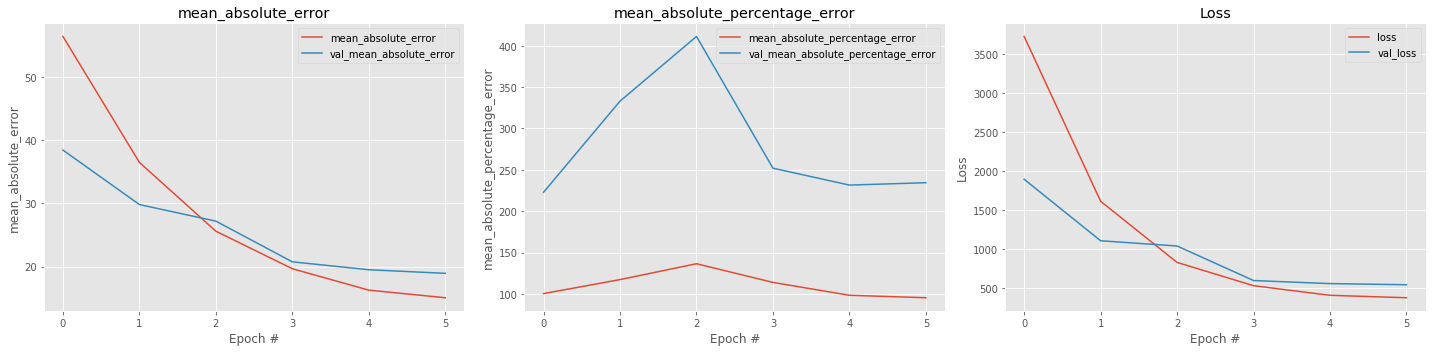

In [79]:
plot_model_history(model.history, measures = ["mean_absolute_error", "mean_absolute_percentage_error", "loss"])

In [0]:
predizioni= preds= model.predict(final_padded_test)
preds_train= model.predict(final_padded_train)
preds[:5]

index= np.arange(len(ytest))
ytest= pd.Series(ytest.values,  index= index )
preds= pd.DataFrame(preds, index= index).squeeze()

In [81]:
preds.shape, ytest.shape

((13270,), (13270,))

In [83]:
summary_reg_model(model, final_padded_train, final_padded_test, preds_train, predizioni )


train MAE is 15.568 
test MAE is 18.763 

train RMSE is 20.094 
test RMSE is 22.77 

test MAPE is 211.628 


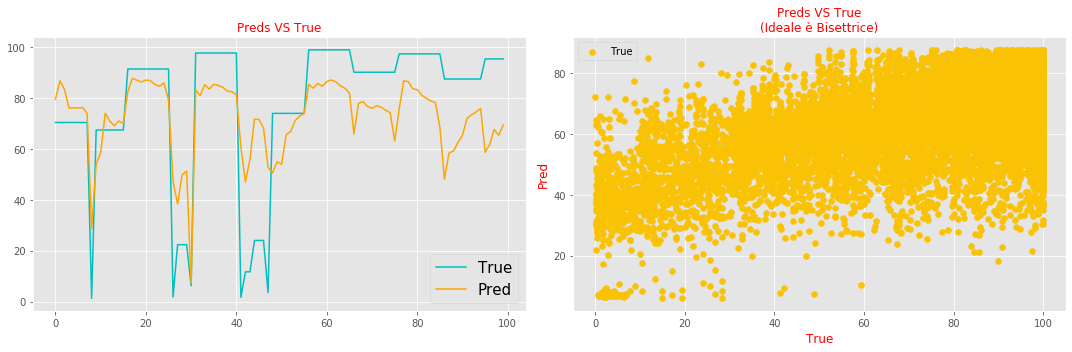

In [82]:
plot_preds_true(ytest, preds, single_model= True, plot_only_reg= False, n_to_show= 100, diz_models= None, n_cols= 2)

# **Final runs, with iterative Parameter Tuning**

In [0]:
def run_model(model, param_grid= None, verbose=5, cv=3, n_jobs= None, return_single_mod= True, return_results=True, n_to_show= 1000, summary= True,
              early= None, measures = ["mean_absolute_error", "mean_absolute_error", "loss"], batch_size= 64, epochs= 50, random=False): 
    """estimator è il modello, task puo essere: ['reg', 'reg']. \n
    Return Grid Search estimator. """
    
      #Naming Convention
    X_test= final_inputs_test= final_padded_test
    X_train= final_inputs_train= final_padded_train
    estimator= model

    temp=time.time()
      
    if param_grid is None:
      history= model.fit(X_train, ytrain, validation_split= 0.2, epochs=epochs, verbose=2, batch_size= batch_size, callbacks= [early])
      if summary:
        history.model.summary()

      plot_model_history(history, measures= measures)
      summaries= summary_reg_model(model, X_train, X_test, pred_train=None, pred_test=None, return_diz= True)

      return [history, summaries]

    else:  #se c'è param grid
      if random== False:
        print('\n It is not a single model but a Grid Search \n')
        Grid_RF = GridSearchCV(estimator, param_grid, scoring='neg_mean_absolute_error', cv=cv, return_train_score=True, 
                                n_jobs= n_jobs, verbose= verbose)
      else:
        print('\n It is not a single model but a (Randomized) Grid Search \n')
        Grid_RF = RandomizedSearchCV(estimator, param_distributions=param_grid, 
                                      scoring='neg_mean_absolute_error', cv=cv, return_train_score=True, verbose= verbose, n_jobs= n_jobs)
      

      ################ Faccio il FIT ##################
      Grid_RF.fit(X_train, ytrain.values, callbacks= [early] )
      model= Grid_RF
      summaries= summary_reg_grid(Grid_RF, X_train, ytrain, X_test, ytest)
 
    pred_train= model.predict(X_train)
    pred_test= model.predict(X_test)

    pred_train= pd.DataFrame(pred_train, index= np.arange(len(X_train))).squeeze()
    pred_test= pd.DataFrame(pred_test, index= np.arange(len(X_test))).squeeze()
          
    plot_preds_true(ytest, pred_test, single_model= True, plot_only_reg= False, n_to_show= 100, diz_models= None, n_cols= 2)

    """title_ticks_ecc('True vs Predicted', '' , '', figsize= (10,6))
    plt.plot(ytest[: n_to_show], color='c', label= 'True')
    plt.plot(pred_test[: n_to_show], color='orange', label= 'Pred')
    plt.legend(fontsize= 15)
    plt.show()
    plt.close()"""
      
    print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())

    print(df_cv_results(Grid_RF, n_to_show= 5))

    return [model, summaries]

run_reg_model= run_model

In [0]:
def recurrent_NN(model_type= 'gru', nodi_hiddens= [64,32,16,8], with_dropout=True , dropout= 0.5, lr= 0.00001, n_layers= 1,
                loss_func= 'mean_squared_error', metrics= ['mae', 'mape']): 

  #diz_pre_model= create_embedded_inputs(X_train, X_test, max_emb_size=50, method= 'half')
  model = Sequential()
  for i in range (n_layers):
    if model_type == 'gru' or model_type== 'GRU':
      if n_layers==1:   #devo per forza mettere return sequences= False, sennò mi da errore
        model.add(GRU(nodi_hiddens[0], input_shape= (max_len, num_feats), return_sequences = False))  #activation di defaults
      else:
        if i==0:
          model.add(Dropout(rate= dropout))
          model.add(GRU(nodi_hiddens[0], input_shape= (max_len, num_feats), return_sequences = True))
        elif i>0:
          model.add(Dropout(rate= dropout))
          model.add(GRU(nodi_hiddens[i], return_sequences= False))
    
    if model_type== 'lstm' or model_type== 'LSTM':
      if n_layers==1:   #devo per forza mettere return sequences= False, sennò mi da errore
        model.add(LSTM(nodi_hiddens[0], input_shape= (max_len, num_feats), return_sequences = False))
      else:
        if i==0:
          model.add(Dropout(rate= dropout))
          model.add(LSTM(nodi_hiddens[0], input_shape= (max_len, num_feats), return_sequences = True))
        elif i>0:
          model.add(Dropout(rate= dropout))
          model.add(LSTM(nodi_hiddens[i], return_sequences= False))
          
  #model.add(Dense(1, activation= 'sigmoid'))
  model.add(Dense(1))
  model.compile(loss= 'mean_squared_error', optimizer= optimizers.Adam(lr= lr, ), metrics= metrics)  #fbeta_score(y_true, y_pred, beta=1)

  return model


 It is not a single model but a Grid Search 

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] batch_size=64, dropout=0.5, epochs=20, lr=0.001, n_layers=1, nodi_hiddens=[64, 32] 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/20
 - 7s - loss: 2824.7128 - mean_absolute_error: 47.4465 - mean_absolute_percentage_error: 132.9286
Epoch 2/20
 - 4s - loss: 993.7788 - mean_absolute_error: 27.9446 - mean_absolute_percentage_error: 131.3444
Epoch 3/20
 - 4s - loss: 569.4986 - mean_absolute_error: 20.5065 - mean_absolute_percentage_error: 122.8166
Epoch 4/20
 - 4s - loss: 472.7892 - mean_absolute_error: 17.7811 - mean_absolute_percentage_error: 118.4763
Epoch 5/20
 - 4s - loss: 444.1250 - mean_absolute_error: 16.7490 - mean_absolute_percentage_error: 117.0200
Epoch 6/20
 - 4s - loss: 433.8771 - mean_absolute_error: 16.3488 - mean_absolute_percentage_error: 115.6852
Epoch 7/20
 - 4s - loss: 427.5829 - mean_absolute_error: 16.1093 - mean_absolute_percentage_error: 114.1503
Epoch 8/20
 - 4s - loss: 422.6038 - mean_absolute_error: 15.9284 - mean_absolute_percentage_error: 113.4780
Epoch 9/20
 - 5s - loss: 418.7102 - mean_absolute_error: 15.8036 - mean_absolute_percentage_error: 113.1210
Epoch 10/20
 - 5s - loss: 4

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.6min remaining:    0.0s


Epoch 1/20
 - 7s - loss: 3056.5921 - mean_absolute_error: 50.4512 - mean_absolute_percentage_error: 105.0880
Epoch 2/20
 - 4s - loss: 1055.5454 - mean_absolute_error: 29.1583 - mean_absolute_percentage_error: 138.5210
Epoch 3/20
 - 5s - loss: 578.3221 - mean_absolute_error: 20.7383 - mean_absolute_percentage_error: 124.4820
Epoch 4/20
 - 4s - loss: 415.0632 - mean_absolute_error: 16.6054 - mean_absolute_percentage_error: 102.6412
Epoch 5/20
 - 4s - loss: 379.5833 - mean_absolute_error: 15.2922 - mean_absolute_percentage_error: 99.5885
Epoch 6/20
 - 4s - loss: 365.3143 - mean_absolute_error: 14.6972 - mean_absolute_percentage_error: 98.0544
Epoch 7/20
 - 4s - loss: 358.1992 - mean_absolute_error: 14.3742 - mean_absolute_percentage_error: 96.8289
Epoch 8/20
 - 5s - loss: 353.2888 - mean_absolute_error: 14.1553 - mean_absolute_percentage_error: 95.2713
Epoch 9/20
 - 5s - loss: 349.8530 - mean_absolute_error: 14.0202 - mean_absolute_percentage_error: 95.1125
Epoch 10/20
 - 5s - loss: 346.8

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  3.2min remaining:    0.0s


Epoch 1/20
 - 13s - loss: 3672.9525 - mean_absolute_error: 54.8659 - mean_absolute_percentage_error: 113.4203
Epoch 2/20
 - 9s - loss: 2103.4639 - mean_absolute_error: 41.3123 - mean_absolute_percentage_error: 149.5721
Epoch 3/20
 - 9s - loss: 1307.0167 - mean_absolute_error: 32.6792 - mean_absolute_percentage_error: 183.6389
Epoch 4/20
 - 9s - loss: 951.2608 - mean_absolute_error: 27.5773 - mean_absolute_percentage_error: 211.4464
Epoch 5/20
 - 9s - loss: 829.0692 - mean_absolute_error: 25.0004 - mean_absolute_percentage_error: 231.5862
Epoch 6/20
 - 9s - loss: 712.6418 - mean_absolute_error: 22.7537 - mean_absolute_percentage_error: 198.2647
Epoch 00006: early stopping
[CV]  batch_size=64, dropout=0.5, epochs=20, lr=0.001, n_layers=2, nodi_hiddens=[64, 32], score=(train=-20.219, test=-19.980), total= 1.0min
[CV] batch_size=64, dropout=0.5, epochs=20, lr=0.001, n_layers=2, nodi_hiddens=[64, 32] 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  4.3min remaining:    0.0s


Epoch 1/20
 - 13s - loss: 4134.0030 - mean_absolute_error: 59.8312 - mean_absolute_percentage_error: 101.7485
Epoch 2/20
 - 9s - loss: 2338.9266 - mean_absolute_error: 44.4383 - mean_absolute_percentage_error: 114.3116
Epoch 3/20
 - 9s - loss: 1367.3905 - mean_absolute_error: 33.6649 - mean_absolute_percentage_error: 130.3957
Epoch 4/20
 - 10s - loss: 887.8673 - mean_absolute_error: 26.6756 - mean_absolute_percentage_error: 144.9353
Epoch 5/20
 - 10s - loss: 695.9563 - mean_absolute_error: 22.7519 - mean_absolute_percentage_error: 157.6864
Epoch 6/20
 - 9s - loss: 639.6553 - mean_absolute_error: 20.8904 - mean_absolute_percentage_error: 165.9845
Epoch 00006: early stopping
[CV]  batch_size=64, dropout=0.5, epochs=20, lr=0.001, n_layers=2, nodi_hiddens=[64, 32], score=(train=-20.382, test=-22.630), total= 1.1min
[CV] batch_size=256, dropout=0.5, epochs=20, lr=0.001, n_layers=1, nodi_hiddens=[64, 32] 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.4min remaining:    0.0s


Epoch 1/20
 - 6s - loss: 3995.7017 - mean_absolute_error: 57.5032 - mean_absolute_percentage_error: 106.5850
Epoch 2/20
 - 2s - loss: 2736.7955 - mean_absolute_error: 47.2147 - mean_absolute_percentage_error: 131.0067
Epoch 3/20
 - 2s - loss: 2052.5045 - mean_absolute_error: 40.8979 - mean_absolute_percentage_error: 150.5226
Epoch 4/20
 - 2s - loss: 1577.0453 - mean_absolute_error: 35.9252 - mean_absolute_percentage_error: 165.4777
Epoch 5/20
 - 2s - loss: 1222.6589 - mean_absolute_error: 31.4853 - mean_absolute_percentage_error: 154.0988
Epoch 6/20
 - 2s - loss: 966.5437 - mean_absolute_error: 27.7677 - mean_absolute_percentage_error: 138.1444
Epoch 00006: early stopping
[CV]  batch_size=256, dropout=0.5, epochs=20, lr=0.001, n_layers=1, nodi_hiddens=[64, 32], score=(train=-26.227, test=-27.577), total=  20.9s
[CV] batch_size=256, dropout=0.5, epochs=20, lr=0.001, n_layers=1, nodi_hiddens=[64, 32] 
Epoch 1/20
 - 6s - loss: 4745.1871 - mean_absolute_error: 64.5080 - mean_absolute_perce

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  7.5min finished


Epoch 1/20
 - 13s - loss: 1951.0793 - mean_absolute_error: 38.4919 - mean_absolute_percentage_error: 130.9006
Epoch 2/20
 - 9s - loss: 494.1480 - mean_absolute_error: 18.5995 - mean_absolute_percentage_error: 114.8662
Epoch 3/20
 - 9s - loss: 409.0596 - mean_absolute_error: 15.8534 - mean_absolute_percentage_error: 109.2388
Epoch 4/20
 - 9s - loss: 396.0034 - mean_absolute_error: 15.3064 - mean_absolute_percentage_error: 107.8167
Epoch 5/20
 - 9s - loss: 389.9356 - mean_absolute_error: 15.0548 - mean_absolute_percentage_error: 106.6628
Epoch 6/20
 - 9s - loss: 386.2959 - mean_absolute_error: 14.9070 - mean_absolute_percentage_error: 105.4529
Epoch 7/20
 - 9s - loss: 383.9235 - mean_absolute_error: 14.8467 - mean_absolute_percentage_error: 105.2899
Epoch 8/20
 - 9s - loss: 381.8250 - mean_absolute_error: 14.7633 - mean_absolute_percentage_error: 103.7834
Epoch 9/20
 - 9s - loss: 379.3240 - mean_absolute_error: 14.6957 - mean_absolute_percentage_error: 103.4261
Epoch 10/20
 - 9s - loss: 

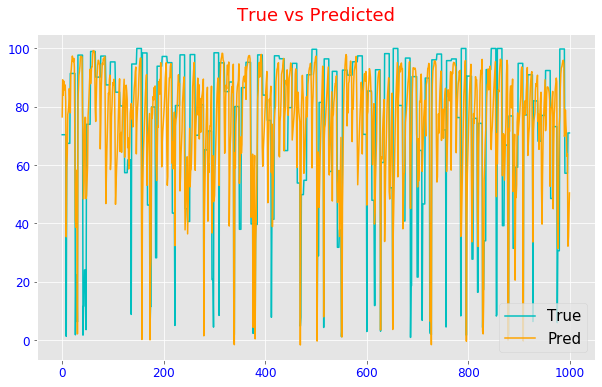

execution time (min)= 10.8  finished at  2019-11-12 23:30:10.960046
  param_batch_size param_dropout param_epochs param_lr param_n_layers  \
0               64           0.5           20    0.001              1   
1               64           0.5           20    0.001              2   
2              256           0.5           20    0.001              1   
3              256           0.5           20    0.001              2   

  param_nodi_hiddens  mean_test_score  mean_train_score  
0           [64, 32]       -15.639175        -14.215405  
1           [64, 32]       -21.304592        -20.300724  
2           [64, 32]       -27.862317        -27.303970  
3           [64, 32]       -42.713075        -42.720766  


In [89]:
early = EarlyStopping(monitor='mean_absolute_percentage_error', mode='min', verbose=3, patience=5, min_delta= 0.5/100) 

param_grid = dict(nodi_hiddens= [[64,32]], 
        n_layers= [1, 2],
        epochs= [20],
        batch_size= [64, 256],
        dropout= [0.5] ,
        lr= [1e-03])  #5% di prob di droppare un link

gru_1h = KerasRegressor(build_fn= recurrent_NN, epochs=10, batch_size= 128, verbose=2)
history_one= run_model(gru_1h,  param_grid= param_grid, early= early, cv=2, n_to_show=10)

In [91]:
df_cv_results(history_one[0], n_to_show= 10)

,param_batch_size,param_dropout,param_epochs,param_lr,param_n_layers,param_nodi_hiddens,mean_test_score,mean_train_score
0,64,0.5,20,0.001,1,"[64, 32]",-15.639175,-14.215405
1,64,0.5,20,0.001,2,"[64, 32]",-21.304592,-20.300724
2,256,0.5,20,0.001,1,"[64, 32]",-27.862317,-27.303970
3,256,0.5,20,0.001,2,"[64, 32]",-42.713075,-42.720766



 It is not a single model but a Grid Search 

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] batch_size=32, dropout=0.5, epochs=25, lr=0.001, n_layers=1, nodi_hiddens=[64, 32] 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/25
 - 12s - loss: 1821.4433 - mean_absolute_error: 36.7817 - mean_absolute_percentage_error: 133.8075
Epoch 2/25
 - 8s - loss: 518.8868 - mean_absolute_error: 19.0677 - mean_absolute_percentage_error: 121.0673
Epoch 3/25
 - 8s - loss: 442.7253 - mean_absolute_error: 16.6425 - mean_absolute_percentage_error: 117.1038
Epoch 4/25
 - 8s - loss: 429.6253 - mean_absolute_error: 16.1161 - mean_absolute_percentage_error: 115.1774
Epoch 5/25
 - 8s - loss: 424.0821 - mean_absolute_error: 15.8991 - mean_absolute_percentage_error: 115.0619
Epoch 6/25
 - 8s - loss: 419.5730 - mean_absolute_error: 15.7507 - mean_absolute_percentage_error: 113.8958
Epoch 7/25
 - 8s - loss: 417.9227 - mean_absolute_error: 15.7184 - mean_absolute_percentage_error: 113.2326
Epoch 8/25
 - 8s - loss: 414.4297 - mean_absolute_error: 15.6005 - mean_absolute_percentage_error: 112.2696
Epoch 9/25
 - 8s - loss: 411.3619 - mean_absolute_error: 15.5043 - mean_absolute_percentage_error: 111.4896
Epoch 10/25
 - 8s - loss: 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.4min remaining:    0.0s


Epoch 1/25
 - 13s - loss: 2008.2047 - mean_absolute_error: 39.2009 - mean_absolute_percentage_error: 124.5294
Epoch 2/25
 - 8s - loss: 492.0071 - mean_absolute_error: 18.5680 - mean_absolute_percentage_error: 112.2661
Epoch 3/25
 - 8s - loss: 377.3540 - mean_absolute_error: 15.1199 - mean_absolute_percentage_error: 100.6616
Epoch 4/25
 - 8s - loss: 361.2416 - mean_absolute_error: 14.4281 - mean_absolute_percentage_error: 98.0770
Epoch 5/25
 - 8s - loss: 354.6441 - mean_absolute_error: 14.1585 - mean_absolute_percentage_error: 97.0221
Epoch 6/25
 - 8s - loss: 350.6206 - mean_absolute_error: 14.0209 - mean_absolute_percentage_error: 95.6648
Epoch 7/25
 - 8s - loss: 347.5808 - mean_absolute_error: 13.9119 - mean_absolute_percentage_error: 94.6641
Epoch 8/25
 - 8s - loss: 344.4322 - mean_absolute_error: 13.8199 - mean_absolute_percentage_error: 93.2857
Epoch 9/25
 - 8s - loss: 342.2382 - mean_absolute_error: 13.7335 - mean_absolute_percentage_error: 92.7517
Epoch 10/25
 - 8s - loss: 339.71

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.8min remaining:    0.0s


Epoch 1/25
 - 16s - loss: 1058.4450 - mean_absolute_error: 26.5509 - mean_absolute_percentage_error: 130.5555
Epoch 2/25
 - 12s - loss: 445.1344 - mean_absolute_error: 16.6069 - mean_absolute_percentage_error: 118.5776
Epoch 3/25
 - 11s - loss: 434.1849 - mean_absolute_error: 16.2322 - mean_absolute_percentage_error: 116.9330
Epoch 4/25
 - 11s - loss: 428.4631 - mean_absolute_error: 16.0393 - mean_absolute_percentage_error: 115.5558
Epoch 5/25
 - 11s - loss: 423.7106 - mean_absolute_error: 15.8763 - mean_absolute_percentage_error: 114.5524
Epoch 6/25
 - 11s - loss: 420.6214 - mean_absolute_error: 15.7644 - mean_absolute_percentage_error: 114.0297
Epoch 7/25
 - 11s - loss: 417.6817 - mean_absolute_error: 15.6521 - mean_absolute_percentage_error: 114.0712
Epoch 8/25
 - 12s - loss: 415.1431 - mean_absolute_error: 15.5739 - mean_absolute_percentage_error: 112.7938
Epoch 9/25
 - 12s - loss: 412.7609 - mean_absolute_error: 15.5127 - mean_absolute_percentage_error: 112.5594
Epoch 10/25
 - 12s

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 11.9min remaining:    0.0s


Epoch 1/25
 - 17s - loss: 1229.7291 - mean_absolute_error: 28.8848 - mean_absolute_percentage_error: 130.3721
Epoch 2/25
 - 12s - loss: 385.4903 - mean_absolute_error: 15.2997 - mean_absolute_percentage_error: 102.9822
Epoch 3/25
 - 12s - loss: 366.6195 - mean_absolute_error: 14.5542 - mean_absolute_percentage_error: 99.6681
Epoch 4/25
 - 12s - loss: 358.7282 - mean_absolute_error: 14.2672 - mean_absolute_percentage_error: 98.1312
Epoch 5/25
 - 12s - loss: 354.3795 - mean_absolute_error: 14.1104 - mean_absolute_percentage_error: 97.2516
Epoch 6/25
 - 12s - loss: 351.6222 - mean_absolute_error: 14.0135 - mean_absolute_percentage_error: 95.9387
Epoch 7/25
 - 12s - loss: 348.8475 - mean_absolute_error: 13.9222 - mean_absolute_percentage_error: 95.4715
Epoch 8/25
 - 12s - loss: 346.5945 - mean_absolute_error: 13.8500 - mean_absolute_percentage_error: 94.6046
Epoch 9/25
 - 12s - loss: 344.1534 - mean_absolute_error: 13.7833 - mean_absolute_percentage_error: 93.9706
Epoch 10/25
 - 12s - loss

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 17.1min remaining:    0.0s


Epoch 1/25
 - 10s - loss: 2712.5503 - mean_absolute_error: 46.4141 - mean_absolute_percentage_error: 129.4835
Epoch 2/25
 - 5s - loss: 944.9165 - mean_absolute_error: 27.1922 - mean_absolute_percentage_error: 129.0217
Epoch 3/25
 - 5s - loss: 556.2674 - mean_absolute_error: 20.1859 - mean_absolute_percentage_error: 122.1707
Epoch 4/25
 - 5s - loss: 467.3037 - mean_absolute_error: 17.6203 - mean_absolute_percentage_error: 117.9640
Epoch 5/25
 - 5s - loss: 440.5568 - mean_absolute_error: 16.6328 - mean_absolute_percentage_error: 116.3080
Epoch 6/25
 - 5s - loss: 431.2459 - mean_absolute_error: 16.2735 - mean_absolute_percentage_error: 115.2308
Epoch 7/25
 - 5s - loss: 424.7274 - mean_absolute_error: 16.0390 - mean_absolute_percentage_error: 114.6901
Epoch 8/25
 - 5s - loss: 420.0324 - mean_absolute_error: 15.8417 - mean_absolute_percentage_error: 113.5338
Epoch 9/25
 - 5s - loss: 416.2637 - mean_absolute_error: 15.7139 - mean_absolute_percentage_error: 112.7067
Epoch 10/25
 - 5s - loss: 

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 28.2min finished


Epoch 1/25
 - 21s - loss: 1121.3790 - mean_absolute_error: 27.2904 - mean_absolute_percentage_error: 120.7695
Epoch 2/25
 - 16s - loss: 409.3744 - mean_absolute_error: 15.7847 - mean_absolute_percentage_error: 109.7229
Epoch 3/25
 - 16s - loss: 395.5125 - mean_absolute_error: 15.2350 - mean_absolute_percentage_error: 107.8709
Epoch 4/25
 - 16s - loss: 390.1845 - mean_absolute_error: 15.0236 - mean_absolute_percentage_error: 107.0409
Epoch 5/25
 - 16s - loss: 385.9760 - mean_absolute_error: 14.8774 - mean_absolute_percentage_error: 105.6973
Epoch 6/25
 - 16s - loss: 384.0228 - mean_absolute_error: 14.8150 - mean_absolute_percentage_error: 104.9772
Epoch 7/25
 - 16s - loss: 381.4326 - mean_absolute_error: 14.7265 - mean_absolute_percentage_error: 104.4328
Epoch 8/25
 - 16s - loss: 379.5023 - mean_absolute_error: 14.6723 - mean_absolute_percentage_error: 103.7290
Epoch 9/25
 - 15s - loss: 377.6941 - mean_absolute_error: 14.6140 - mean_absolute_percentage_error: 103.1751
Epoch 10/25
 - 15s

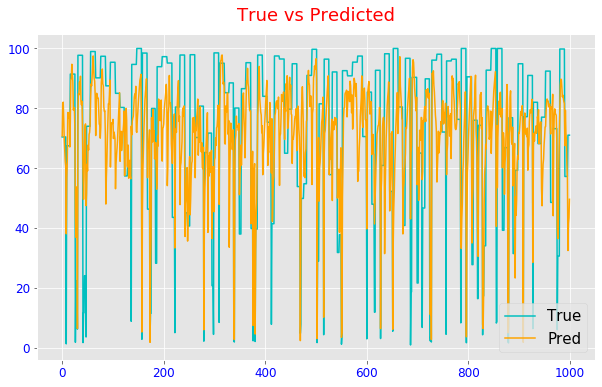

execution time (min)= 35.1  finished at  2019-11-13 00:15:02.442506
  param_batch_size param_dropout param_epochs param_lr param_n_layers  \
3               64           0.5           25    0.001              1   
1               32           0.5           25    0.001              1   
2               64           0.5           25    0.001              1   
0               32           0.5           25    0.001              1   

  param_nodi_hiddens  mean_test_score  mean_train_score  
3          [128, 64]       -15.535683        -13.934172  
1          [128, 64]       -15.730627        -13.649152  
2           [64, 32]       -15.845174        -14.085923  
0           [64, 32]       -16.008907        -13.879087  


In [92]:
early = EarlyStopping(monitor='mean_absolute_percentage_error', mode='min', verbose=3, patience=4, min_delta= 0.5/100) 

param_grid = dict(nodi_hiddens= [[64,32], [128, 64]], 
        n_layers= [1],
        epochs= [25],
        batch_size= [32, 64],
        dropout= [0.5] ,
        lr= [1e-03]) 

lstm_1h = KerasRegressor(build_fn= recurrent_NN, epochs=10, batch_size= 128, verbose=2)
history_one= run_model(lstm_1h,  param_grid= param_grid, early= early, cv=2, n_to_show=10)

In [93]:
df_cv_results(history_one[0], n_to_show= 10)

,param_batch_size,param_dropout,param_epochs,param_lr,param_n_layers,param_nodi_hiddens,mean_test_score,mean_train_score
3,64,0.5,25,0.001,1,"[128, 64]",-15.535683,-13.934172
1,32,0.5,25,0.001,1,"[128, 64]",-15.730627,-13.649152
2,64,0.5,25,0.001,1,"[64, 32]",-15.845174,-14.085923
0,32,0.5,25,0.001,1,"[64, 32]",-16.008907,-13.879087


In [0]:
#######################################################  LSTM ########################################à


 It is not a single model but a Grid Search 

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] batch_size=64, dropout=0.5, epochs=25, lr=0.001, model_type=lstm, n_layers=2, nodi_hiddens=[64, 32, 16] 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/25
 - 21s - loss: 3568.2068 - mean_absolute_error: 54.0252 - mean_absolute_percentage_error: 115.2748
Epoch 2/25
 - 11s - loss: 2017.6605 - mean_absolute_error: 40.4916 - mean_absolute_percentage_error: 152.2279
Epoch 3/25
 - 11s - loss: 1259.9681 - mean_absolute_error: 32.0894 - mean_absolute_percentage_error: 186.4396
Epoch 4/25
 - 11s - loss: 931.2524 - mean_absolute_error: 27.2226 - mean_absolute_percentage_error: 214.1693
Epoch 5/25
 - 11s - loss: 823.4520 - mean_absolute_error: 24.8171 - mean_absolute_percentage_error: 233.4248
Epoch 00005: early stopping
[CV]  batch_size=64, dropout=0.5, epochs=25, lr=0.001, model_type=lstm, n_layers=2, nodi_hiddens=[64, 32, 16], score=(train=-24.147, test=-22.785), total= 1.2min
[CV] batch_size=64, dropout=0.5, epochs=25, lr=0.001, model_type=lstm, n_layers=2, nodi_hiddens=[64, 32, 16] 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s


Epoch 1/25
 - 21s - loss: 3998.2076 - mean_absolute_error: 58.7324 - mean_absolute_percentage_error: 102.2927
Epoch 2/25
 - 11s - loss: 2231.8157 - mean_absolute_error: 43.3401 - mean_absolute_percentage_error: 115.1555
Epoch 3/25
 - 11s - loss: 1303.8313 - mean_absolute_error: 32.8418 - mean_absolute_percentage_error: 130.9544
Epoch 4/25
 - 11s - loss: 856.8369 - mean_absolute_error: 26.1405 - mean_absolute_percentage_error: 146.4439
Epoch 5/25
 - 11s - loss: 684.4741 - mean_absolute_error: 22.4453 - mean_absolute_percentage_error: 158.6174
Epoch 00005: early stopping
[CV]  batch_size=64, dropout=0.5, epochs=25, lr=0.001, model_type=lstm, n_layers=2, nodi_hiddens=[64, 32, 16], score=(train=-21.348, test=-23.209), total= 1.2min


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.5min finished


Epoch 1/25
 - 34s - loss: 3119.7685 - mean_absolute_error: 50.6115 - mean_absolute_percentage_error: 118.9379
Epoch 2/25
 - 23s - loss: 1145.2642 - mean_absolute_error: 30.3839 - mean_absolute_percentage_error: 167.3444
Epoch 3/25
 - 23s - loss: 664.4360 - mean_absolute_error: 22.1622 - mean_absolute_percentage_error: 162.1569
Epoch 4/25
 - 22s - loss: 488.0937 - mean_absolute_error: 18.0240 - mean_absolute_percentage_error: 129.2887
Epoch 5/25
 - 23s - loss: 459.3965 - mean_absolute_error: 16.9498 - mean_absolute_percentage_error: 125.0241
Epoch 00005: early stopping
best param combination:  {'batch_size': 64, 'dropout': 0.5, 'epochs': 25, 'lr': 0.001, 'model_type': 'lstm', 'n_layers': 2, 'nodi_hiddens': [64, 32, 16]}

Train MAE is 22.7473 
Validation MAE  (best mean CV score) is  22.9971 
Test MAE is 17.097 

train RMSE is 20.4034 
test RMSE is 21.2746 

train MAPE is 118.0 
test MAPE is 126.0816 
execution time (min)= 5.0  finished at  2019-11-13 00:48:47.026031
  param_batch_size p

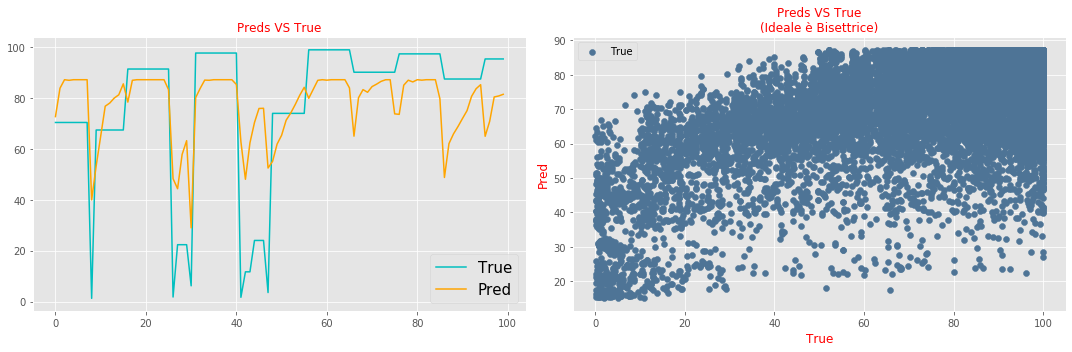

In [102]:
early = EarlyStopping(monitor='mean_absolute_percentage_error', mode='min', verbose=3, patience=4, min_delta= 0.5/100) 

param_grid = dict(nodi_hiddens= [[64,32, 16]], 
        n_layers= [2],
        epochs= [25],
        batch_size= [64],
        dropout= [0.5] ,
        lr= [1e-03],
        model_type= ['lstm']) 

lstm_1h = KerasRegressor(build_fn= recurrent_NN, epochs=10, batch_size= 128, verbose=2)
mix_1h= run_model(lstm_1h,  param_grid= param_grid, early= early, cv=2, n_to_show=10)

In [98]:
df_cv_results(mix_1h[0], n_to_show= 10)

,param_batch_size,param_dropout,param_epochs,param_lr,param_model_type,param_n_layers,param_nodi_hiddens,mean_test_score,mean_train_score
0,64,0.5,20,0.001,lstm,1,"[64, 32]",-15.587391,-14.780716


In [0]:
############################ 2 hiddens ################################


 It is not a single model but a Grid Search 

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV] batch_size=32, dropout=0.5, epochs=20, lr=0.001, model_type=lstm, n_layers=2, nodi_hiddens=[32, 32] 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/20
 - 36s - loss: 3250.8024 - mean_absolute_error: 52.1897 - mean_absolute_percentage_error: 66.9695
Epoch 2/20
 - 19s - loss: 1147.1832 - mean_absolute_error: 30.2304 - mean_absolute_percentage_error: 44.4808
Epoch 3/20
 - 19s - loss: 588.5943 - mean_absolute_error: 21.1968 - mean_absolute_percentage_error: 40.2191
Epoch 4/20
 - 19s - loss: 462.1002 - mean_absolute_error: 18.0606 - mean_absolute_percentage_error: 36.8522
Epoch 5/20
 - 19s - loss: 386.4550 - mean_absolute_error: 16.0037 - mean_absolute_percentage_error: 32.4961
Epoch 6/20
 - 19s - loss: 368.7268 - mean_absolute_error: 15.4072 - mean_absolute_percentage_error: 31.6344
Epoch 7/20
 - 20s - loss: 361.5697 - mean_absolute_error: 15.1171 - mean_absolute_percentage_error: 31.1304
Epoch 8/20
 - 19s - loss: 354.8849 - mean_absolute_error: 14.9135 - mean_absolute_percentage_error: 30.6854
Epoch 9/20
 - 19s - loss: 356.3321 - mean_absolute_error: 14.9220 - mean_absolute_percentage_error: 30.8515
Epoch 10/20
 - 19s - loss:

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.1min remaining:    0.0s


Epoch 1/20
 - 39s - loss: 3470.1502 - mean_absolute_error: 54.8143 - mean_absolute_percentage_error: 67.6783
Epoch 2/20
 - 21s - loss: 1184.2113 - mean_absolute_error: 30.9352 - mean_absolute_percentage_error: 41.0619
Epoch 3/20
 - 20s - loss: 525.1864 - mean_absolute_error: 20.0139 - mean_absolute_percentage_error: 32.9389
Epoch 4/20
 - 20s - loss: 422.9158 - mean_absolute_error: 16.8540 - mean_absolute_percentage_error: 32.0211
Epoch 5/20
 - 20s - loss: 417.9128 - mean_absolute_error: 16.3668 - mean_absolute_percentage_error: 32.1374
Epoch 6/20
 - 21s - loss: 367.2668 - mean_absolute_error: 15.4775 - mean_absolute_percentage_error: 28.9958
Epoch 7/20
 - 20s - loss: 324.2197 - mean_absolute_error: 14.3172 - mean_absolute_percentage_error: 26.6703
Epoch 8/20
 - 21s - loss: 313.4351 - mean_absolute_error: 13.9201 - mean_absolute_percentage_error: 26.0469
Epoch 9/20
 - 20s - loss: 308.7759 - mean_absolute_error: 13.7098 - mean_absolute_percentage_error: 25.7176
Epoch 10/20
 - 20s - loss:

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 14.5min remaining:    0.0s


Epoch 1/20
 - 40s - loss: 3073.1873 - mean_absolute_error: 50.6256 - mean_absolute_percentage_error: 64.9507
Epoch 2/20
 - 22s - loss: 1087.9751 - mean_absolute_error: 29.4256 - mean_absolute_percentage_error: 43.8846
Epoch 3/20
 - 22s - loss: 576.1432 - mean_absolute_error: 20.8899 - mean_absolute_percentage_error: 40.1647
Epoch 4/20
 - 22s - loss: 512.5093 - mean_absolute_error: 18.7106 - mean_absolute_percentage_error: 40.6954
Epoch 5/20
 - 21s - loss: 430.8273 - mean_absolute_error: 17.1250 - mean_absolute_percentage_error: 35.3973
Epoch 6/20
 - 21s - loss: 371.2057 - mean_absolute_error: 15.4954 - mean_absolute_percentage_error: 31.7360
Epoch 7/20
 - 21s - loss: 360.8944 - mean_absolute_error: 15.1287 - mean_absolute_percentage_error: 31.1057
Epoch 8/20
 - 22s - loss: 356.7890 - mean_absolute_error: 14.9412 - mean_absolute_percentage_error: 30.7724
Epoch 9/20
 - 22s - loss: 350.6541 - mean_absolute_error: 14.7681 - mean_absolute_percentage_error: 30.3558
Epoch 10/20
 - 22s - loss:

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 22.0min remaining:    0.0s


Epoch 1/20
 - 40s - loss: 3499.6306 - mean_absolute_error: 55.1085 - mean_absolute_percentage_error: 67.9896
Epoch 2/20
 - 22s - loss: 1209.4754 - mean_absolute_error: 31.2885 - mean_absolute_percentage_error: 41.3983
Epoch 3/20
 - 22s - loss: 531.5563 - mean_absolute_error: 20.1675 - mean_absolute_percentage_error: 33.0213
Epoch 4/20
 - 22s - loss: 423.3872 - mean_absolute_error: 16.8876 - mean_absolute_percentage_error: 32.0228
Epoch 5/20
 - 21s - loss: 416.7290 - mean_absolute_error: 16.3773 - mean_absolute_percentage_error: 32.0709
Epoch 6/20
 - 21s - loss: 336.8236 - mean_absolute_error: 14.8589 - mean_absolute_percentage_error: 27.4115
Epoch 7/20
 - 22s - loss: 314.4211 - mean_absolute_error: 13.9997 - mean_absolute_percentage_error: 26.1377
Epoch 8/20
 - 22s - loss: 310.0453 - mean_absolute_error: 13.7617 - mean_absolute_percentage_error: 25.8239
Epoch 9/20
 - 21s - loss: 305.8757 - mean_absolute_error: 13.6214 - mean_absolute_percentage_error: 25.6235
Epoch 10/20
 - 23s - loss:

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 28.9min remaining:    0.0s


Epoch 1/20
 - 34s - loss: 3153.8155 - mean_absolute_error: 51.3410 - mean_absolute_percentage_error: 65.9275
Epoch 2/20
 - 17s - loss: 1112.8817 - mean_absolute_error: 29.7704 - mean_absolute_percentage_error: 44.1836
Epoch 3/20
 - 17s - loss: 581.1884 - mean_absolute_error: 21.0287 - mean_absolute_percentage_error: 40.2291
Epoch 4/20
 - 17s - loss: 512.8312 - mean_absolute_error: 18.7478 - mean_absolute_percentage_error: 40.6736
Epoch 5/20
 - 17s - loss: 494.7064 - mean_absolute_error: 18.2662 - mean_absolute_percentage_error: 39.6750
Epoch 6/20
 - 17s - loss: 385.2378 - mean_absolute_error: 16.0222 - mean_absolute_percentage_error: 32.3102
Epoch 7/20
 - 16s - loss: 365.6002 - mean_absolute_error: 15.2746 - mean_absolute_percentage_error: 31.2806
Epoch 8/20
 - 16s - loss: 358.5424 - mean_absolute_error: 15.0120 - mean_absolute_percentage_error: 30.8322
Epoch 9/20
 - 16s - loss: 356.1119 - mean_absolute_error: 14.9260 - mean_absolute_percentage_error: 30.6087
Epoch 10/20
 - 16s - loss:

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 52.9min finished


Epoch 1/20
 - 63s - loss: 2320.7208 - mean_absolute_error: 42.6611 - mean_absolute_percentage_error: 55.7082
Epoch 2/20
 - 44s - loss: 520.8308 - mean_absolute_error: 19.4028 - mean_absolute_percentage_error: 36.6446
Epoch 3/20
 - 44s - loss: 454.0162 - mean_absolute_error: 17.2621 - mean_absolute_percentage_error: 35.8388
Epoch 4/20
 - 44s - loss: 344.3203 - mean_absolute_error: 14.7701 - mean_absolute_percentage_error: 29.0457
Epoch 5/20
 - 44s - loss: 331.9747 - mean_absolute_error: 14.2987 - mean_absolute_percentage_error: 28.2519
Epoch 6/20
 - 44s - loss: 327.6736 - mean_absolute_error: 14.1590 - mean_absolute_percentage_error: 27.9219
Epoch 7/20
 - 44s - loss: 327.0292 - mean_absolute_error: 14.1374 - mean_absolute_percentage_error: 27.8574
Epoch 8/20
 - 44s - loss: 326.6856 - mean_absolute_error: 14.1225 - mean_absolute_percentage_error: 27.8418
Epoch 9/20
 - 43s - loss: 326.2379 - mean_absolute_error: 14.0963 - mean_absolute_percentage_error: 27.8381
Epoch 10/20
 - 44s - loss: 

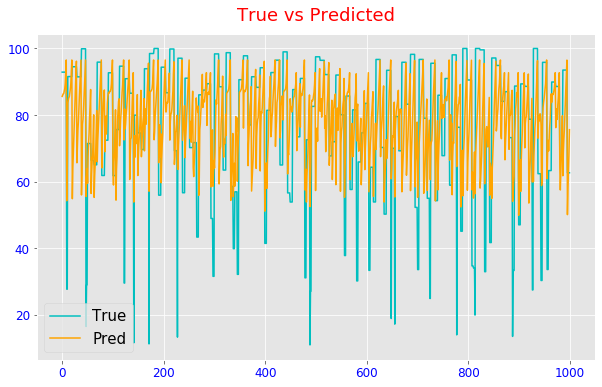

execution time (min)= 68.5  finished at  2019-11-05 16:21:07.660765
  param_batch_size param_dropout param_epochs param_lr param_model_type  \
1               32           0.5           20    0.001             lstm   
3               32           0.5           20    0.001              gru   
0               32           0.5           20    0.001             lstm   
2               32           0.5           20    0.001              gru   

  param_n_layers param_nodi_hiddens  mean_test_score  mean_train_score  
1              2           [64, 32]       -13.846732        -13.585548  
3              2           [64, 32]       -13.888027        -13.582783  
0              2           [32, 32]       -13.962014        -13.565253  
2              2           [32, 32]       -13.963158        -13.624609  


In [0]:
early = EarlyStopping(monitor='mean_absolute_percentage_error', mode='min', verbose=3, patience=4, min_delta= 0.5/100) 

param_grid = dict(nodi_hiddens= [[32,32], [64,32]], 
        n_layers= [2],
        epochs= [20],
        batch_size= [32],
        dropout= [0.5] ,
        lr= [1e-03],
        model_type= ['lstm', 'gru']) 

rnn = KerasRegressor(build_fn= recurrent_NN, epochs=10, batch_size= 128, verbose=2)
mix_2h= run_model(rnn,  param_grid= param_grid, early= early, cv=2, n_jobs=1, verbose=5)

In [0]:
df_cv_results(mix_2h[0], n_to_show= 10)

,param_batch_size,param_dropout,param_epochs,param_lr,param_model_type,param_n_layers,param_nodi_hiddens,mean_test_score,mean_train_score
1,32,0.5,20,0.001,lstm,2,"[64, 32]",-13.846732,-13.585548
3,32,0.5,20,0.001,gru,2,"[64, 32]",-13.888027,-13.582783
0,32,0.5,20,0.001,lstm,2,"[32, 32]",-13.962014,-13.565253
2,32,0.5,20,0.001,gru,2,"[32, 32]",-13.963158,-13.624609
